## **Introduction and importing libraries**

In [0]:
# Kalman filter for tracking a projectile, 
# Author: Rumit Kumar


# Import support libraries

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from numpy.linalg import inv


## **Initialization Parameters**

In [0]:
V0 = 100

theta = np.pi/4

states = np.array([[0], 
                   [V0*np.cos(theta)], 
                   [0], 
                   [V0*np.sin(theta)]])
P= np.identity(4)

R = 0.8*np.array([[1, 0, 0, 0], 
     [0, 1, 0, 0], 
     [0, 0, 1, 0], 
     [0, 0, 0, 1]])

In [0]:
Q = 0.8*np.array([[1, 0, 0, 0], 
     [0, 1, 0, 0], 
     [0, 0, 1, 0], 
     [0, 0, 0, 1]])

dt = 0.01

time = 15

no_of_steps = int(time/dt)

t = np.linspace(0,time, no_of_steps)

A = np.array([[1, dt, 0, 0], 
              [0, 1, 0, 0], 
              [0, 0, 1, dt], 
              [0, 0, 0, 1]])
B = np.array([[0], [0] , [-0.5*dt**2], [-dt]])
H = np.array([[1, 0, 0, 0], 
     [0, 1, 0, 0], 
     [0, 0, 1, 0], 
     [0, 0, 0, 1]])

vx = V0*np.cos(theta)*np.ones(no_of_steps, dtype = float)
vy = V0*np.sin(theta) - 9.81*t
x = V0*np.cos(theta)*t
y = V0*np.sin(theta)*t - (9.81*t**2)/2

states_measurements_arr = []
xpos = []
vx_arr = []
ypos = []
vy_arr = []

x_meas = []
vx_meas = []
y_meas = []
vy_meas = []
time = []
time_meas = []

for i in range(0, len(vx)):
  states_measurements = (x[i], vx[i], y[i], vy[i])
  
  states_measurements_arr.append(states_measurements)
  
# np.array([states_measurements_arr[0]])
# print(np.array([states_measurements_arr[0]]).T)
# print(A)
# print(states)

## **Main recursive loop**

In [0]:

k = 0
for j in range(0,no_of_steps):
    states_predict = np.matmul(A, states) + B*9.81;
#     print(states_predict)
    P_predict = np.matmul(np.matmul(A,P), A.T) + Q;    
#     print(P_predict)    
    K_t = np.matmul(P_predict, H.T)*inv((np.matmul(np.matmul(P_predict,H), H.T) + R))
    K_t[np.isnan(K_t)] = 0

#     print(K_t)    
    
    if j == 0: 
      states_meas = np.matmul(H, np.array([states_measurements_arr[j]]).T) + 5*np.random.rand(4,1)
#         print(states_meas)
      x_meas.append(float(states_meas[0])) 
      vx_meas.append(float(states_meas[1])) 
      y_meas.append(float(states_meas[2]))
      vy_meas.append(float(states_meas[3]))
      time_meas.append(j*dt)
      k = k+1
    elif j%50 == 0:
        states_meas = np.matmul(H, np.array([states_measurements_arr[j]]).T) + 5*np.random.rand(4,1)
        x_meas.append(float(states_meas[0]))
        vx_meas.append(float(states_meas[1]))
        y_meas.append(float(states_meas[2]))
        vy_meas.append(float(states_meas[3]))
        time_meas.append(j*dt)
        k = k+1

#         print(states_meas)

        
    states_correct = states_predict + np.matmul(K_t, (states_meas-np.matmul(H,states_predict)))
#     print(states_correct)
    P_correct = np.matmul((np.identity(4)- np.matmul(K_t,H)), P_predict)
    
    states = states_correct
    P = P_correct
    xpos.append(float(states[0])) 
    vx_arr.append(float(states[1]))
    ypos.append(float(states[2])) 
    vy_arr.append(float(states[3])) 
    time.append(j*dt)
#     print(states)

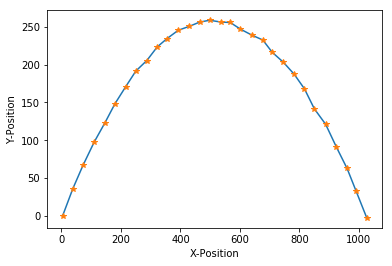

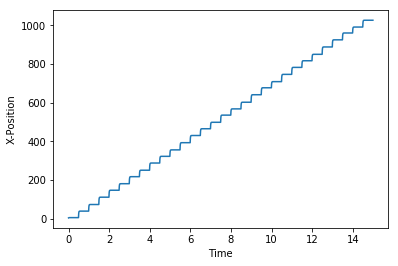

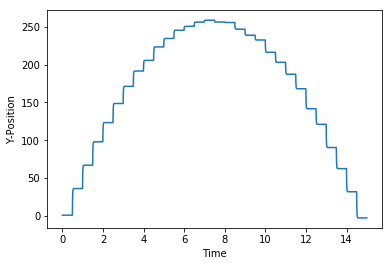

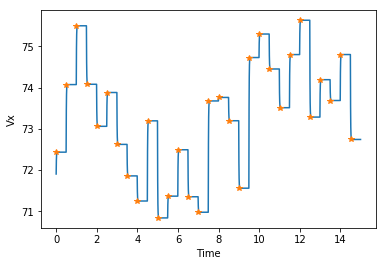

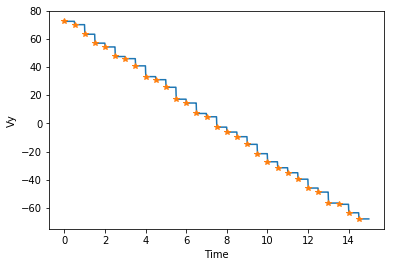

In [0]:

plt.plot(xpos, ypos, x_meas, y_meas, '*')
plt.xlabel('X-Position')
plt.ylabel('Y-Position')
plt.show()


plt.plot(time, xpos)
plt.xlabel('Time')
plt.ylabel('X-Position')
plt.show()

plt.plot(time, ypos)
plt.xlabel('Time')
plt.ylabel('Y-Position')
plt.show()


plt.plot(time, vx_arr, time_meas, vx_meas, '*')
plt.xlabel('Time')
plt.ylabel('Vx')
plt.show()

plt.plot(time, vy_arr, time_meas, vy_meas, '*')
plt.xlabel('Time')
plt.ylabel('Vy')
plt.show()